# An analysis of production and consumption energy data

With this analysis we would like to study data about the production and consumption of energy across the world. The data is taken from a publicly available dataset maintained by the United States. It contains for every country the production and consumption of energy from 4 sources: Coal, Petroleum and other liquids, Natural gas, Nuclear with renewables. The data covers the period 1980-2017.

We are interested in answering questions of these kind:
1. Who are the top producers? Who are the top consumers?
2. Who are the top NET producers and consumers?
3. Which energy sources provide more energy across the world? Have they changed over time?
4. Which energy sources has surged/plunged its production/consumption the most?
[comment]: # (5. Are there any countries who drastically changed their energy production or consumption?)
[comment]: # (6. Optionally, can we relate drastic changes to big events in human history?)

This project aims to give examples of the kind of questions one can answer, and which insights can be drawn. It is not intendend to be a full-fledged analysis of the data.

In [110]:
#We disable warnings caused by old versions of the packages.
import warnings
warnings.filterwarnings('ignore')

## Dataset preparation

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

years = [str(x) for x in np.arange(1980,2018)]

In [112]:
with open('INT-Export-02-05-2020_10-33-34.csv','r') as datafile:
    df = pd.read_csv(datafile,skiprows=1)
df.head(20)

API  \
0                       NaN   
1     INTL.44-1-WORL-QBTU.A   
2   INTL.4411-1-WORL-QBTU.A   
3   INTL.4413-1-WORL-QBTU.A   
4   INTL.4415-1-WORL-QBTU.A   
5   INTL.4419-1-WORL-QBTU.A   
6     INTL.44-2-WORL-QBTU.A   
7   INTL.4411-2-WORL-QBTU.A   
8   INTL.4413-2-WORL-QBTU.A   
9   INTL.4415-2-WORL-QBTU.A   
10  INTL.4419-2-WORL-QBTU.A   
11                      NaN   
12     INTL.44-1-AFG-QBTU.A   
13   INTL.4411-1-AFG-QBTU.A   
14   INTL.4413-1-AFG-QBTU.A   
15   INTL.4415-1-AFG-QBTU.A   
16   INTL.4419-1-AFG-QBTU.A   
17     INTL.44-2-AFG-QBTU.A   
18   INTL.4411-2-AFG-QBTU.A   
19   INTL.4413-2-AFG-QBTU.A   

                                           Unnamed: 1                1980  \
0                                               World                 NaN   
1                               Production (quad Btu)     294.74838406197   
2                                     Coal (quad Btu)     78.527956128971   
3                              Natural gas (quad Btu)        54.761045594   
4              Petroleum and other liquids (quad Btu)      133.1091110412   
5           Nuclear, renewables, and other (quad Btu)       28.3502712978   
6                              Consumption (quad Btu)     293.49410000612   
7                                     Coal (quad Btu)      79.23791409161   
8                              Natural gas (quad Btu)        53.865223303   
9              Petroleum and other liquids (quad Btu)     132.10545053583   
10          Nuclear, renewables, and other (quad Btu)      28.28551207568   
11                                        Afghanistan                 NaN   
12                              Production (quad Btu)   0.072561153807481   
13                                    Coal (quad Btu)  0.0023552858074807   
14                             Natural gas (quad Btu)             0.06282   
15             Petroleum and other liquids (quad Btu)                   0   
16          Nuclear, renewables, and other (quad Btu)         0.007385868   
17                             Consumption (quad Btu)   0.026583214338372   
18                                    Coal (quad Btu)  0.0024792482148389   
19                             Natural gas (quad Btu)            0.002094   

                  1981                1982                1983  \
0                  NaN                 NaN                 NaN   
1      289.43174714723     288.47487960674     291.41919143562   
2      78.934051331729      81.75286020774     82.059945901122   
3         55.573536747        55.495522664        56.115951591   
4        125.110234787       119.763580494       119.268212016   
5        29.8139242815        31.462916241       33.9750819275   
6      290.87338662739      291.3583223428     295.13828945129   
7       80.42817521254     82.080132294511      84.00437654192   
8         53.895423471        54.055255448        55.149772666   
9      126.85117743666     123.94925024148     122.25389847024   
10     29.698610507191     31.273684358808     33.730241773129   
11                 NaN                 NaN                 NaN   
12   0.092723652748444   0.095067864158469   0.099712806158469   
13  0.0024740397484437  0.0028698861584695  0.0028698861584695   
14            0.082713            0.084807            0.088995   
15                   0                   0                   0   
16         0.007536613         0.007390978          0.00784792   
17   0.029949455734824   0.031897811400399   0.039021789554432   
18  0.0026042523630414  0.0030209327940489  0.0030209327940489   
19            0.003141            0.005235            0.005235   

                  1984                1985                1986  \
0                  NaN                 NaN                 NaN   
1      307.60247485361      315.0934437612     325.33703806709   
2       86.35165219701     90.309708677196     92.630349708591   
3         61.758597532        64.124522824          65.3286482   
4        122.552942918       121.1339

In [113]:
#Country names are stored in the "Unnamed: 1" column (i.e. the index) corresponding to rows where the values are NaN. We want to extract them
df = df.set_index('Unnamed: 1')
country_rows = df[df.loc[:,'API'].isna()]
country_labels = country_rows.index
country_labels

Index(['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wake Island', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Unnamed: 1', length=231)

In [114]:
#We keep all the other rows as data
data_lines = df[df.loc[:,'API'].notna()].copy()
data_lines.head(11)

API  \
Unnamed: 1                                                                   
    Production (quad Btu)                            INTL.44-1-WORL-QBTU.A   
        Coal (quad Btu)                            INTL.4411-1-WORL-QBTU.A   
        Natural gas (quad Btu)                     INTL.4413-1-WORL-QBTU.A   
        Petroleum and other liquids (quad Btu)     INTL.4415-1-WORL-QBTU.A   
        Nuclear, renewables, and other (quad Btu)  INTL.4419-1-WORL-QBTU.A   
    Consumption (quad Btu)                           INTL.44-2-WORL-QBTU.A   
        Coal (quad Btu)                            INTL.4411-2-WORL-QBTU.A   
        Natural gas (quad Btu)                     INTL.4413-2-WORL-QBTU.A   
        Petroleum and other liquids (quad Btu)     INTL.4415-2-WORL-QBTU.A   
        Nuclear, renewables, and other (quad Btu)  INTL.4419-2-WORL-QBTU.A   
    Production (quad Btu)                             INTL.44-1-AFG-QBTU.A   

                                                                1980  \
Unnamed: 1                                                             
    Production (quad Btu)                            294.74838406197   
        Coal (quad Btu)                              78.527956128971   
        Natural gas (quad Btu)                          54.761045594   
        Petroleum and other liquids (quad Btu)        133.1091110412   
        Nuclear, renewables, and other (quad Btu)      28.3502712978   
    Consumption (quad Btu)                           293.49410000612   
        Coal (quad Btu)                               79.23791409161   
        Natural gas (quad Btu)                          53.865223303   
        Petroleum and other liquids (quad Btu)       132.10545053583   
        Nuclear, renewables, and other (quad Btu)     28.28551207568   
    Production (quad Btu)                          0.072561153807481   

                                                                1981  \
Unnamed: 1                                                             
    Production (quad Btu)                            289.43174714723   
        Coal (quad Btu)                              78.934051331729   
        Natural gas (quad Btu)                          55.573536747   
        Petroleum and other liquids (quad Btu)         125.110234787   
        Nuclear, renewables, and other (quad Btu)      29.8139242815   
    Consumption (quad Btu)                           290.87338662739   
        Coal (quad Btu)                               80.42817521254   
        Natural gas (quad Btu)                          53.895423471   
        Petroleum and other liquids (quad Btu)       126.85117743666   
        Nuclear, renewables, and other (quad Btu)    29.698610507191   
    Production (quad Btu)                          0.092723652748444   

                                                                1982  \
Unnamed: 1                                                             
    Production (quad Btu)                            288.47487960674   
        Coal (quad Btu)                               81.75286020774   
        Natural gas (quad Btu)                          55.495522664   
        Petroleum and other liquids (quad Btu)         119.763580494   
        Nuclear, renewables, and other (quad Btu)       31.462916241   
    Consumption (quad Btu)                            291.3583223428   
        Coal (quad Btu)                              82.080132294511   
        Natural gas (quad Btu)                          54.055255448   
        Petroleum and other liquids (quad Btu)       123.94925024148   
        Nuclear, renewables, and other (quad Btu)    31.273684358808   
    Production (quad Btu)                          0.095067864158469   

                                                                1983  \
Unnamed: 1                                                             
    Production (quad Btu)                            291.41919143562   
        Coal (quad Btu)      

I want to replace the values "INTL.etc" with the country name. For every country there are 10 such lines. So I will check out blocks of 10 lines and replace the values in the column "API" with the strings previously extracted in country_labels.

Moreover, "Production" and "Consumption" refer each to 5 lines, i.e. also to the 4 lines below where they are written. So I'd like to use them as a higher rank index, with "Petroleum", "Coal", etc as lower rank index. So I have to pull out "Production" and "Consumption", make them span 5 lines each and in the first line write "Total".

In [115]:
#Replace the code in the "API" column with the country name
rows,cols = data_lines.shape
for i in np.arange(0,rows,10):
    data_lines.iloc[i:i+10,0] = country_labels[int(i/10)]

#Change the column label to "Country"
data_lines = data_lines.rename(columns={"API": "Country"})

In [116]:
#Pull index as a column
data_lines = data_lines.reset_index()
data_lines = data_lines.rename(columns={"Unnamed: 1": "Type"})

#Rename columns with sensible names
data_lines.loc[data_lines["Type"]=="    Production (quad Btu)","Type"] = "Total (quad Btu)"
data_lines.loc[data_lines["Type"]=="    Consumption (quad Btu)","Type"] = "Total (quad Btu)"
data_lines.loc[:,"Type"] = data_lines.loc[:,"Type"].map(lambda x: x.lstrip().rstrip(' (quad Btu)'))


#Construct a new "Category" column to be used as higher-rank index. The last assignment works as a JOIN so it works because we reset the index, otherwise we'd get all NaNs as the labels would not match.
base_pattern = ["Production"]*5 + ["Consumption"]*5
data_lines["Category"] = pd.Series( base_pattern*(int(rows/10)) )

In [117]:
#Set the multi-index
data_lines = data_lines.set_index(["Category","Type"])

In [118]:
#Replace unkonwn values with NaN so that we can recast columns as floats
data_lines = data_lines.replace("--",np.nan)
#data_lines.dtypes
data_lines.iloc[:,1:cols] = data_lines.iloc[:,1:cols].applymap(lambda x: float(x))

#The default type for strings is "object", so there is no need to recast the Country column as strings, it will not have any effect. A dedicated type will be introduced in version 1.0 of Pandas.
#data_lines["Country"] = data_lines["Country"].map(lambda x: str(x))
#If one really wants to check that everything is a string, the following must return True
#data_lines["Country"].map(lambda x: isinstance(x,str)).all()

In [119]:
#Since we are using a multi-index dataframe, we really need to sort the index before diving into data analysis. When a multi-index is not lexsorted the performance decreases drastically, to the point that Pandas throws a Warning
data_lines.sort_index()

Country         1980         1981  \
Category    Type                                                        
Consumption Coal                      World      79.2379      80.4282   
            Coal                Afghanistan   0.00247925   0.00260425   
            Coal                    Albania    0.0245845    0.0260206   
            Coal                    Algeria   0.00261443   0.00767462   
            Coal             American Samoa            0            0   
            Coal                     Angola            0            0   
            Coal                 Antarctica            0            0   
            Coal        Antigua and Barbuda            0            0   
            Coal                  Argentina    0.0370555     0.033287   
            Coal                    Armenia          NaN          NaN   
            Coal                      Aruba          NaN          NaN   
            Coal                  Australia      1.08899      1.12235   
            Coal                    Austria      0.11888     0.123842   
            Coal                 Azerbaijan          NaN          NaN   
            Coal                    Bahrain            0            0   
            Coal                 Bangladesh  0.000483959  0.000506612   
            Coal                   Barbados            0            0   
            Coal                    Belarus          NaN          NaN   
            Coal                    Belgium     0.475977       0.4707   
            Coal                     Belize            0            0   
            Coal                      Benin            0            0   
            Coal                    Bermuda            0            0   
            Coal                     Bhutan  1.77582e-05  1.84272e-05   
            Coal                    Bolivia            0            0   
            Coal     Bosnia and Herzegovina          NaN          NaN   
            Coal                   Botswana   0.00867998   0.00943249   
            Coal                     Brazil     0.198695     0.210846   
            Coal     British Virgin Islands            0            0   
            Coal                     Brunei            0            0   
            Coal                   Bulgaria     0.387707     0.392069   
...                                     ...          ...          ...   
Production  Total                  Tanzania     0.010253    0.0106516   
            Total                  Thailand    0.0296536    0.0909785   
            Total               The Bahamas            0            0   
            Total               Timor-Leste          NaN          NaN   
            Total                      Togo  0.000394744  0.000397214   
            Total                     Tonga            0            0   
            Total       Trinidad and Tobago     0.550037     0.612448   
            Total                   Tunisia     0.244863     0.262116   
            Total                    Turkey     0.383879     0.417319   
            Total              Turkmenistan          NaN          NaN   
            Total  Turks and Caicos Islands            0            0   
            Total                    Tuvalu            0            0   
            Total      U.S. Pacific Islands            0            0   
            Total          U.S. Territories            0            0   
            Total       U.S. Virgin Islands            0            0   
            Total                    Uganda    0.0065756   0.00536239   
            Total                   Ukraine          NaN          NaN   
            Total      United Arab Emirates      3.88781      3.45406   
            Total            United Kingdom      8.70767      9.01328   
            Total             United States      67.1454      66.9095   
            Total                   Uruguay    0.0233626    0.0263416   
            Total                Uzbekistan          NaN          NaN   
            Total    

#### A quick look at the data

Let's have a quick peek on some data, starting with some random countries: Norway, Russia, Saudi Arabia, USA, Costa Rica and the World. First we define functions to do our plots, then we actually perform them.

In [120]:
def plot_consumption(df):
    cons = df.loc[('Consumption',),:]
    cons.iloc[:,1:cols].T.plot()
    plt.xticks(np.arange(0,41,10),np.arange(1980,2021,10))


def plot_production(df):
    prod = df.loc[("Production",),:]
    prod.iloc[:,1:cols].T.plot()
    plt.xticks(np.arange(0,41,10),np.arange(1980,2021,10))


def plot_shares(df):
    df_2017 = df.loc[:,"2017"]
    fig, ax = plt.subplots()
    plt.subplot(211)
    #Renormalizing by hand, because the pie plot method only renormalize when the sum is > 1, and if the sum is < 1 leaves empy spaces in the chart, because it assumes it has been fed shares fractions already. But this is not my case and can screw some charts so we rescale.
    prod = df_2017.loc[("Production",["Coal","Natural gas","Petroleum and other liquids","Nuclear, renewables, and other"])].T
    prod = prod/prod.sum()
    prod.plot(kind="pie",labels=None)
    plt.title("Production")
    plt.subplot(212)
    cons = df_2017.loc[("Consumption",["Coal","Natural gas","Petroleum and other liquids","Nuclear, renewables, and other"])].T
    cons = cons/cons.sum()
    cons.plot(kind="pie",labels=None)
    plt.title("Consumption")
    fig.legend(labels=["Coal","Gas","Nuclear and renewables","Petroleum"],loc="lower right")

In [121]:
df_norway = data_lines[data_lines.loc[:,"Country"]=="Norway"].copy().sort_index()

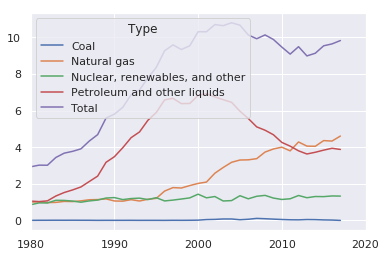

In [122]:
plot_production(df_norway)

In [123]:
plot_consumption(df_norway)

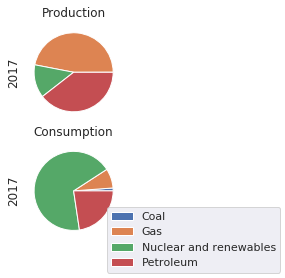

In [124]:
plot_shares(df_norway)

Norway's data is interesting as it is an oil-producing countries with unique features. From the charts we can see that they even lowered petroleum production since the mid-90s, while they started producing natural gas. Nuclear and renewables are not really produced more, but they make a larger and larger share of the consumption---the consumption trend follows the renewables one. This suggests that the new way of consuming energy were planned to use renewables all along!

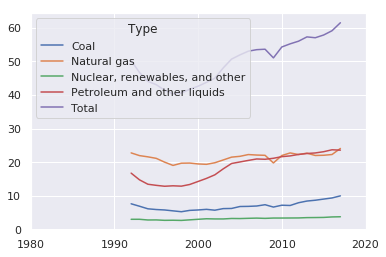

In [125]:
df_russia = data_lines[data_lines.loc[:,"Country"]=="Russia"].copy().sort_index()
plot_production(df_russia)

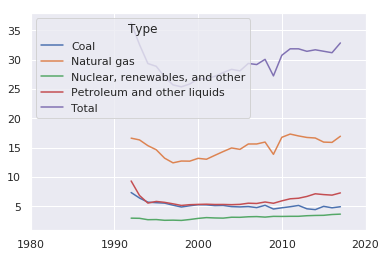

In [126]:
plot_consumption(df_russia)

In [127]:
plot_shares(df_russia)

Russia's data starts from the early 90s, as it is earlier registered as URSS. We can see a big decrease right after the start of the data, from which the country recovered over the years. Even if the production is now larger than back then, consumption has not leveled yet.

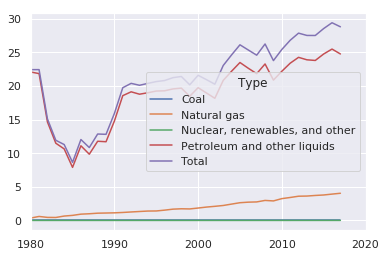

In [128]:
df_saudi = data_lines[data_lines.loc[:,"Country"]=="Saudi Arabia"].copy().sort_index()
plot_production(df_saudi)

In [129]:
plot_consumption(df_saudi)

In [130]:
plot_shares(df_saudi)

As expected, Saudi Arabia is all about oil. They produce 3 times as much energy as they consume, and their petroleum production would be more than enough to supply all their consumption. Petroleum production has been very erratic, probably driven by industry decisions around the world and the necessity to dictate oil prices. This trend is very interesting and is probably worth a deeper investigation.

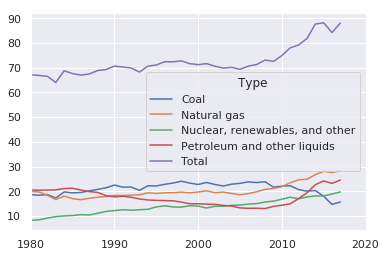

In [131]:
df_us = data_lines[data_lines.loc[:,"Country"]=="United States"].copy().sort_index()
plot_production(df_us)

In [132]:
plot_consumption(df_us)

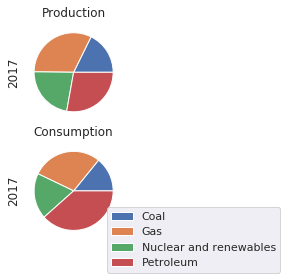

In [133]:
plot_shares(df_us)

The United States show an increase in both production and consumption, without drastic variations in all four categories. The interesting bit here is that since 2010 Coal decreased even though all the other 3 sources increased, and the total production has had its sharpest rise.

In [134]:
df_costarica = data_lines[data_lines.loc[:,"Country"]=="Costa Rica"].copy().sort_index()
plot_production(df_costarica)

In [135]:
plot_consumption(df_costarica)

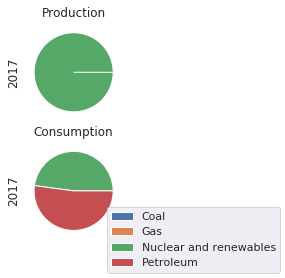

In [136]:
plot_shares(df_costarica)

Costa Rica is committed to produce only clean energy! All the production comes from Nuclear, renewables and other sources, and its total is roughly a half of the total consumption, which is supplied by (imported) Petroleum. So even if they do not produce Petroleum, Coal or Gas energy, they still have to consume it significantly. Compare this with Norway, which is even an oil producer!

## Historical trends per energy source, worldwide

We now do a vista of how the production of energy from the various sources has varied in the considered time period.

In [137]:
df_world = data_lines[data_lines.loc[:,"Country"]=="World"].copy().sort_index()
df_world

Country     1980     1981     1982  \
Category    Type                                                                
Consumption Coal                             World  79.2379  80.4282  82.0801   
            Natural gas                      World  53.8652  53.8954  54.0553   
            Nuclear, renewables, and other   World  28.2855  29.6986  31.2737   
            Petroleum and other liquids      World  132.105  126.851  123.949   
            Total                            World  293.494  290.873  291.358   
Production  Coal                             World   78.528  78.9341  81.7529   
            Natural gas                      World   54.761  55.5735  55.4955   
            Nuclear, renewables, and other   World  28.3503  29.8139  31.4629   
            Petroleum and other liquids      World  133.109   125.11  119.764   
            Total                            World  294.748  289.432  288.475   

                                               1983     1984     1985  \
Category    Type                                                        
Consumption Coal                            84.0044  87.9477  91.3731   
            Natural gas                     55.1498  60.8429  63.3717   
            Nuclear, renewables, and other  33.7302  36.6022   39.162   
            Petroleum and other liquids     122.254  123.526  123.603   
            Total                           295.138  308.919   317.51   
Production  Coal                            82.0599  86.3517  90.3097   
            Natural gas                      56.116  61.7586  64.1245   
            Nuclear, renewables, and other  33.9751  36.9393  39.5252   
            Petroleum and other liquids     119.268  122.553  121.134   
            Total                           291.419  307.602  315.093   

                                               1986     1987     1988  ...  \
Category    Type                                                       ...   
Consumption Coal                            92.6628  95.6071  98.6454  ...   
            Natural gas                     64.2244   67.562    71.01  ...   
            Nuclear, renewables, and other  40.5103  41.8666  44.2297  ...   
            Petroleum and other liquids     127.168   129.52  133.716  ...   
            Total                           324.565  334.556  347.601  ...   
Production  Coal                            92.6303  94.9122  97.0171  ...   
            Natural gas                     65.3286  68.4561  71.8529  ...   
            Nuclear, renewables, and other  40.8308  42.2381  44.5903  ...   
            Petroleum and other liquids     126.547  127.415  132.483  ...   
            Total                           325.337  333.021  345.943  ...   

                                               2008     2009     2010  \
Category    Type                                                        
Consumption Coal                            144.274  144.737  154.273   
            Natural gas                     112.873  109.149  119.424   
            Nuclear, renewables, and other  66.6439  67.3862  71.5068   
            Petroleum and other liquids      175.89  173.029  178.632   
            Total                            499.68  494.302  523.836   
Production  Coal                            141.894  143.972  154.239   
            Natural gas                     111.656  109.557  116.946   
            Nuclear, renewables, and other  68.7943   69.655  74.1268   
            Petroleum and other liquids     171.533  168.759  172.978   
            Total                           493.877  491.944   518.29   

                                               2011     2012     2013  \
Category    Type                                                        
Consumption Coal                            163.827  169.743  173.101   
            Natural gas                     122.992  125.803  127.655   
            Nuclear, renewables, and other  72.3636  72.5873  76.3551   
            Pe

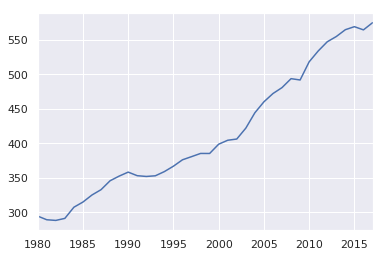

In [138]:
world_tot = df_world.loc[("Production","Total"),years].copy().sort_index()
world_tot.plot()

We start from plotting the aggregated energy production. As largely expected, the world production has increased steadily over the years. Reading from the data table above, we can see that it almost doubled from 1980 to 2017. Even if the increase is indeniable, the graphs hints at the fact that there are streaks were the increase is roughly constant (the slope seems not to vary much), separated by single years of constant production or even decrease. We try to understand this as follows:
 - if a part of the graph is approximable with a line, it should be approximable by an equation like y(t) = mt, where t is the year. In particular the difference between two years is given by y(t_2) - y(t_1) = m(t_2 - t_1), and between two consecutive years equals m. So it should be detected by years where the _absolute_ increase is constant.
 - the absolute increase of course can also tell us if a year sees a constant or decreasing production.

With these points in mind, we try to look at the yearly absolute increase.

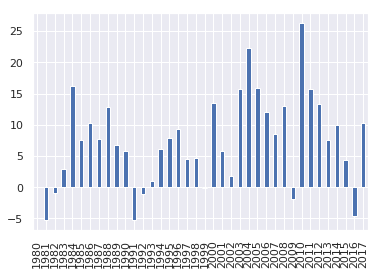

In [139]:
world_tot_year_before = world_tot.shift(periods=1)
world_tot_increase = world_tot - world_tot_year_before
world_tot_increase.plot(kind="bar")

The absolute variation in world energy production shows indeed a loop pattern, although slithly different from what we predicted from the line plot. Streaks of 5-7 years of continuous increase are separated by 1-2 years of no variation or decrease. Of course we should also look at the scale: in the large picture, increases of 5 Btu or of 25 Btu are not that different. But let's focus on the decreasing years, which are arguably much more significant being rarer.

In [140]:
decrease_years = world_tot_increase[world_tot_increase < 0].index
decrease_years

Index(['1981', '1982', '1991', '1992', '1999', '2009', '2016'], dtype='object')

It would be interesting to see if these years are linked to historical events. For now, we can only make predictions: the 2009 decrease was likely caused by the global crisis, the 1991-1992 one by the war in the Persian Gulf combined with the dissolution of the Soviet Union.

[comment]: # (We'll try to verify our predictions by separating energy sources, for example the Gulf war hit, if present, should be linked to production of petroleum energy.)

#### Coal

In [141]:
world_coal = df_world.loc[("Production","Coal"),years].copy().sort_index()
world_coal.plot()

In [142]:
world_coal = world_coal.astype(float)
peak_year = world_coal.idxmax()
peak_year

'2014'

Coal production had a global maximum in 2014, and a local maximum in 1990. The latter was probably caused by a diminished production in the Soviet Union territories. The former may be explained by a global call for greener sources, although this is again only a prediction.

#### Petroleum

In [143]:
world_petrol = df_world.loc[("Production","Petroleum and other liquids"),years].copy().sort_index()
world_petrol.plot()

In [144]:
world_petrol = world_petrol.astype(float)
peak_year = world_petrol.idxmax()
peak_year

'2017'

The data in our possession shows that oil peak is either 2017 or is yet to come. Despite taking many hits, the production of oil energy has always recovered and increased over the years.

#### Natural gas

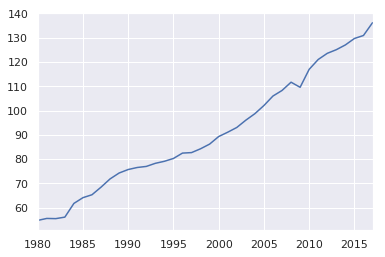

In [145]:
world_gas = df_world.loc[("Production","Natural gas"),years].copy().sort_index()
world_gas.plot()

In [146]:
world_gas = world_gas.astype(float)
peak_year = world_gas.idxmax()
peak_year

'2017'

The natural gas production has always increased, except for a single year: 2009. This may help explaining the local minima in aggregated production in 2009. Production of energy from natural gas seems to go towards further increases.

#### Nuclear, renewables and others

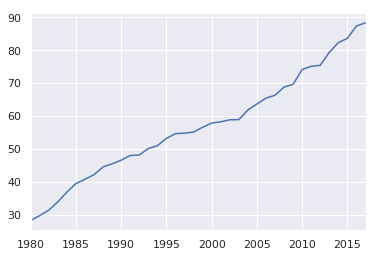

In [147]:
world_nr = df_world.loc[("Production","Nuclear, renewables, and other"),years].copy().sort_index()
world_nr.plot()

In [148]:
world_nr = world_nr.astype(float)
peak_year = world_nr.idxmax()
peak_year

'2017'

Although with fewer Btus overall, energy from Nuclear and Renewables has always increased too. Judging from the line plot, the increasing rate also looks increased, so the expansion of these energy sources looks quicker.

To sum up, coal energy and to a certain extent petroleum energy are more volatile than the other sources, which have more solid trends (but have historically accounted for less energy).

## A more systematic study of top producers and consumers

We now proceed to look for the answer to our first question.

### Top producers

In [149]:
years = [str(x) for x in np.arange(1980,2018)]
ds_top = {}
for kind in ["Total","Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]:
    data = []
    for year in years:
        data.append(data_lines.loc[('Production',kind),["Country",year]].sort_values(by=year,ascending=False).iloc[1,0])
    ds_top[kind] = pd.Series(data=data,index=years)

df = pd.DataFrame(ds_top); df

Coal      Natural gas Nuclear, renewables, and other  \
1980  United States    United States                  United States   
1981  United States    United States                  United States   
1982  United States    United States                  United States   
1983  United States  Former U.S.S.R.                  United States   
1984  United States  Former U.S.S.R.                  United States   
1985          China  Former U.S.S.R.                  United States   
1986          China  Former U.S.S.R.                  United States   
1987          China  Former U.S.S.R.                  United States   
1988          China  Former U.S.S.R.                  United States   
1989          China  Former U.S.S.R.                  United States   
1990          China  Former U.S.S.R.                  United States   
1991          China  Former U.S.S.R.                  United States   
1992          China           Russia                  United States   
1993          China           Russia                  United States   
1994          China           Russia                  United States   
1995          China           Russia                  United States   
1996          China           Russia                  United States   
1997          China    United States                  United States   
1998          China           Russia                  United States   
1999          China           Russia                  United States   
2000          China    United States                  United States   
2001          China    United States                  United States   
2002          China           Russia                  United States   
2003          China           Russia                  United States   
2004          China           Russia                  United States   
2005          China           Russia                  United States   
2006          China           Russia                  United States   
2007          China           Russia                  United States   
2008          China           Russia                  United States   
2009          China    United States                  United States   
2010          China           Russia                  United States   
2011          China    United States                  United States   
2012          China    United States                  United States   
2013          China    United States                  United States   
2014          China    United States                  United States   
2015          China    United States                  United States   
2016          China    United States                  United States   
2017          China    United States                  United States   

     Petroleum and other liquids            Total  
1980             Former U.S.S.R.    United States  
1981             Former U.S.S.R.    United States  
1982             Former U.S.S.R.    United States  
1983             Former U.S.S.R.  Former U.S.S.R.  
1984             Former U.S.S.R.    United States  
1985             Former U.S.S.R.  Former U.S.S.R.  
1986             Former U.S.S.R.  Former U.S.S.R.  
1987             Former U.S.S.R.  Former U.S.S.R.  
1988             Former U.S.S.R.  Former U.S.S.R.  
1989             Former U.S.S.R.  Former U.S.S.R.  
1990             Former U.S.S.R.  Former U.S.S.R.  
1991             Former U.S.S.R.  Former U.S.S.R.  
1992                Saudi Arabia    United States  
1993                Saudi Arabia    United States  
1994                Saudi Arabia    United States  
1995                Saudi Arabia    United States  
1996                Saudi Arabia    United States  
1997                Saudi Arabia    United States  
1998                Saudi Arabia    United States  
1999                Saudi Arabia    United States  
2000                Saudi Arabia    United States  
2001                Saudi Arabia    United States  
2002                Saudi Arabia    United States

It is interesting to see the shifts in the leading producers according to the geopolitical situation. We can also see that despite China being the top coal producer since 1985, it has been the top total producer only since 2006, without leading any other kind of energy production. We are going to explore this relation by plotting data divided by kind of energy produced.

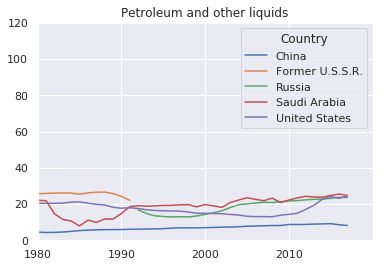

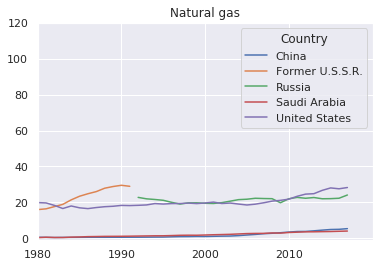

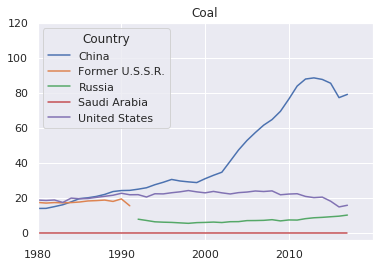

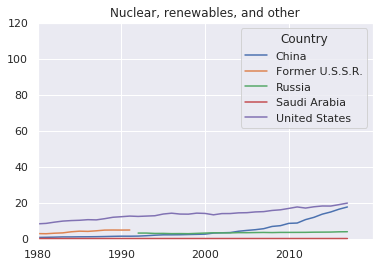

In [150]:
top_producers = data_lines[data_lines["Country"].isin(["Saudi Arabia","Russia","United States","China","Former U.S.S.R."])].sort_index()
for kind in ["Total","Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]:
    top_producers.loc[("Production",kind),:].reset_index(drop=True).set_index("Country").T.plot()
    plt.title(kind)
    plt.xticks(np.arange(0,41,10),["1980","1990","2000","2010"])
    plt.yticks(np.arange(0,121,20),np.arange(0,121,20))

Notice how we put the same y-scale on all charts. From these charts it is pretty clear that the big increase in China's total production that brought them in the first place has been driven by the Coal industry. Let's now evaluate every source of energy separately to look more closely at their trends.

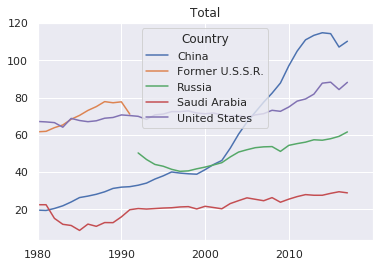

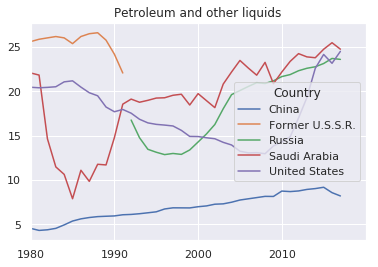

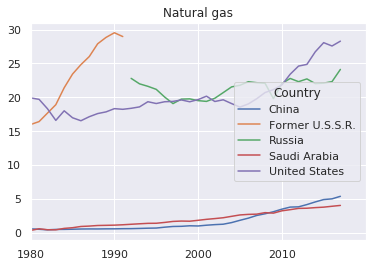

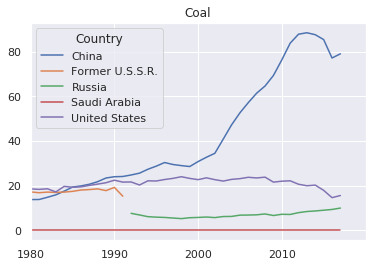

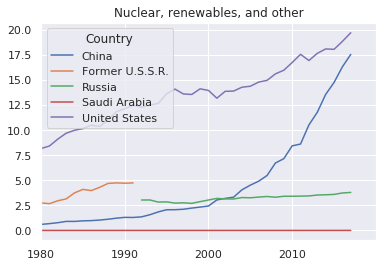

In [151]:
for kind in ["Total","Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]:
    top_producers.loc[("Production",kind),:].reset_index(drop=True).set_index("Country").T.plot()
    plt.title(kind)
    plt.xticks(np.arange(0,41,10),["1980","1990","2000","2010"])

We can now analyse separately the trends per energy source. Other than in coal, which we have discussed already, we can see another big rise: that of Nuclear & Renewable energy in the USA. On the other hand, energy from Petroleum looks like the most oscillating, at least when it comes to top producers.

Of course in absolute terms, China's coal production increase is much larger than USA's nuclear and renewables one. But what if we speak in relative terms?

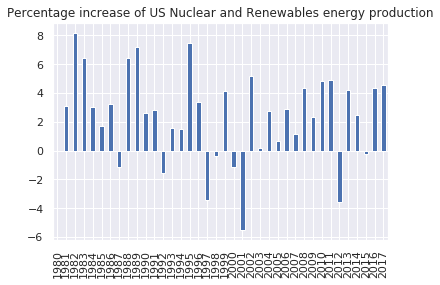

In [152]:
us_nuclear = df_us.loc[("Production","Nuclear, renewables, and other"),years]
us_nuclear_year_before = us_nuclear.shift(periods=1)
us_nuclear_change = 100*( us_nuclear - us_nuclear_year_before )/ us_nuclear_year_before
plt.title("Percentage increase of US Nuclear and Renewables energy production")
us_nuclear_change.plot(kind='bar')

In [153]:
us_nuclear_change

1980         NaN
1981     3.10702
1982     8.18769
1983     6.44704
1984     3.01328
1985     1.69348
1986      3.2646
1987      -1.101
1988     6.43792
1989     7.18142
1990      2.5983
1991     2.84529
1992    -1.52247
1993     1.56625
1994     1.50981
1995     7.50512
1996     3.40957
1997    -3.43152
1998   -0.391209
1999     4.16871
2000    -1.14561
2001    -5.53846
2002     5.19843
2003    0.185625
2004     2.75754
2005    0.673253
2006     2.91517
2007     1.13565
2008     4.33618
2009     2.31857
2010     4.80623
2011     4.89636
2012    -3.53141
2013     4.21585
2014     2.50029
2015   -0.212883
2016     4.37024
2017     4.58615
Name: (Production, Nuclear, renewables, and other), dtype: object

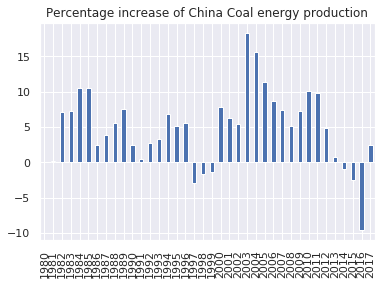

In [154]:
df_china = data_lines[data_lines.loc[:,"Country"]=="China"].copy().sort_index()
china_coal = df_china.loc[("Production","Coal"),years]
china_coal_year_before = china_coal.shift(periods=1)
china_coal_change = 100*( china_coal - china_coal_year_before )/ china_coal_year_before
plt.title("Percentage increase of China Coal energy production")
china_coal_change.plot(kind='bar')

In [155]:
china_coal_change

1980         NaN
1981    0.240268
1982     7.18916
1983     7.23526
1984     10.4544
1985     10.5229
1986     2.49461
1987     3.80855
1988      5.5792
1989      7.5806
1990     2.38581
1991     0.46141
1992     2.79171
1993     3.30447
1994     6.78664
1995     5.09711
1996     5.63145
1997    -2.90844
1998    -1.69295
1999    -1.41838
2000     7.77344
2001        6.31
2002        5.36
2003       18.35
2004       15.68
2005     11.4263
2006        8.65
2007         7.4
2008         5.2
2009         7.3
2010       10.05
2011         9.8
2012         4.8
2013    0.739999
2014   -0.996185
2015    -2.48665
2016    -9.64904
2017     2.42183
Name: (Production, Coal), dtype: object

We can already see from the y-scale that both the largest yearly increase and decrease occurred in China's Coal production. China has also been much more consistent over the years, meaning that they have often kept increasing production, while the N&R US production variation has not been that consistent. This may suggest that the US policies have changed from time to time with regard to these sources.

We can also see another trend from China's data: the relative increase was always at least 4.8% between 2000 and 2012, but then dropped quickly, which means that China stopped expanding its coal energy district. This may (or may not) hint at a decisive change in China's energetic policies.

### Top Net producers

Now we want to find for every source of energy which country is the top net producer, that is which country exports more energy of that kind. Net production is just (production)-(consumption) so we compute it. To do this with code, we first select the Production rows, and then iterating over them we subtract the corresponding Consumption row (with same kind and country).

In [156]:
net_producers = {}
net_consumers = {}
net_frames = {}
for kind in ["Total","Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]:
    net_frames[kind] = data_lines.loc[("Production",kind),:].set_index(["Country"]) - data_lines.loc[("Consumption",kind),:].set_index(["Country"])
    net_frames[kind] = net_frames[kind].drop(index="World").astype(float)
    net_producers[kind] = net_frames[kind].idxmax()
    net_consumers[kind] = net_frames[kind].idxmin()
    
netp_df = pd.DataFrame(net_producers)
netc_df = pd.DataFrame(net_consumers)

In [157]:
netp_df

Coal      Natural gas Nuclear, renewables, and other  \
1980  United States  Former U.S.S.R.                         Canada   
1981  United States  Former U.S.S.R.                         Canada   
1982  United States  Former U.S.S.R.                         Brazil   
1983      Australia  Former U.S.S.R.                         Brazil   
1984  United States  Former U.S.S.R.                         Brazil   
1985      Australia  Former U.S.S.R.                         Brazil   
1986      Australia  Former U.S.S.R.                         Brazil   
1987      Australia  Former U.S.S.R.                         Brazil   
1988      Australia  Former U.S.S.R.                         Brazil   
1989      Australia  Former U.S.S.R.                         Brazil   
1990  United States  Former U.S.S.R.                         Brazil   
1991      Australia  Former U.S.S.R.                         France   
1992      Australia           Russia                         France   
1993      Australia           Russia                         France   
1994      Australia           Russia                         France   
1995      Australia           Russia                          China   
1996      Australia           Russia                          China   
1997      Australia           Russia                          China   
1998      Australia           Russia                          China   
1999      Australia           Russia                          China   
2000      Australia           Russia                          China   
2001      Australia           Russia                          China   
2002      Australia           Russia                          China   
2003      Australia           Russia                          China   
2004      Australia           Russia                          China   
2005      Australia           Russia                          China   
2006      Australia           Russia                          China   
2007      Australia           Russia                          China   
2008      Australia           Russia                  United States   
2009      Australia           Russia                  United States   
2010      Australia           Russia                  United States   
2011      Australia           Russia                  United States   
2012      Australia           Russia                  United States   
2013      Australia           Russia                  United States   
2014      Australia           Russia                  United States   
2015      Australia           Russia                  United States   
2016      Australia           Russia                  United States   
2017      Australia           Russia                  United States   

     Petroleum and other liquids            Total  
1980                Saudi Arabia     Saudi Arabia  
1981                Saudi Arabia     Saudi Arabia  
1982                Saudi Arabia     Saudi Arabia  
1983                Saudi Arabia     Saudi Arabia  
1984                Saudi Arabia  Former U.S.S.R.  
1985             Former U.S.S.R.  Former U.S.S.R.  
1986                Saudi Arabia  Former U.S.S.R.  
1987                Saudi Arabia  Former U.S.S.R.  
1988                Saudi Arabia  Former U.S.S.R.  
1989                Saudi Arabia  Former U.S.S.R.  
1990                Saudi Arabia     Saudi Arabia  
1991                Saudi Arabia     Saudi Arabia  
1992                Saudi Arabia     Saudi Arabia  
1993                Saudi Arabia     Saudi Arabia  
1994                Saudi Arabia     Saudi Arabia  
1995                Saudi Arabia     Saudi Arabia  
1996                Saudi Arabia     Saudi Arabia  
1997                Saudi Arabia     Saudi Arabia  
1998                Saudi Arabia     Saudi Arabia  
1999                Saudi Arabia           Russia  
2000                Saudi Arabia     Saudi Arabia  
2001                Saudi Arabia           Russia  
2002                Saudi Arabia           Russia

In [158]:
netc_df

Coal    Natural gas Nuclear, renewables, and other  \
1980  Japan  Germany, West                     Luxembourg   
1981  Japan  Germany, West                  United States   
1982  Japan  Germany, West                        Hungary   
1983  Japan  Germany, West                  United States   
1984  Japan          Japan                  United States   
1985  Japan          Japan                        Hungary   
1986  Japan          Japan                        Hungary   
1987  Japan          Japan                  United States   
1988  Japan          Japan                          Italy   
1989  Japan  United States                          Italy   
1990  Japan          Japan                          Italy   
1991  Japan          Japan                          Italy   
1992  Japan        Ukraine                          Italy   
1993  Japan        Ukraine                          Italy   
1994  Japan        Ukraine                          Italy   
1995  Japan  United States                          Italy   
1996  Japan  United States                          Italy   
1997  Japan  United States                          Italy   
1998  Japan  United States                          Italy   
1999  Japan  United States                          Italy   
2000  Japan  United States                        Germany   
2001  Japan          Japan                        Germany   
2002  Japan  United States                        Germany   
2003  Japan  United States                          Italy   
2004  Japan  United States                          Italy   
2005  Japan  United States                          Italy   
2006  Japan          Japan                          Italy   
2007  Japan  United States                          Italy   
2008  Japan          Japan                          Italy   
2009  Japan          Japan                          Italy   
2010  Japan          Japan                          Italy   
2011  Japan          Japan                          Italy   
2012  Japan          Japan                          Italy   
2013  China          Japan                          Italy   
2014  China          Japan                          Italy   
2015  China          Japan                          Italy   
2016  China          Japan                          Italy   
2017  China          Japan                         Brazil   

     Petroleum and other liquids          Total  
1980               United States          Japan  
1981               United States          Japan  
1982                       Japan          Japan  
1983               United States          Japan  
1984               United States          Japan  
1985               United States          Japan  
1986               United States          Japan  
1987               United States          Japan  
1988               United States          Japan  
1989               United States  United States  
1990               United States          Japan  
1991               United States          Japan  
1992               United States          Japan  
1993               United States  United States  
1994               United States  United States  
1995               United States  United States  
1996               United States  United States  
1997               United States  United States  
1998               United States  United States  
1999               United States  United States  
2000               United States  United States  
2001               United States  United States  
2002               United States  United States  
2003               United States  United States  
2004               United States  United States  
2005               United States  United States  
2006               United States  United States  
2007               United States  United States  
2008               United States  United States  
2009               United States  United States  
2010               United States  United States  
2011               United S

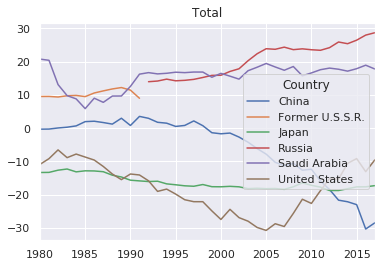

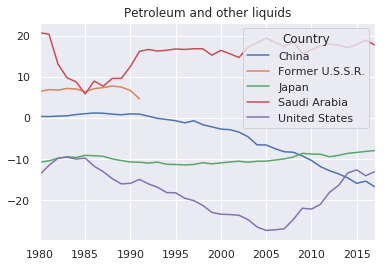

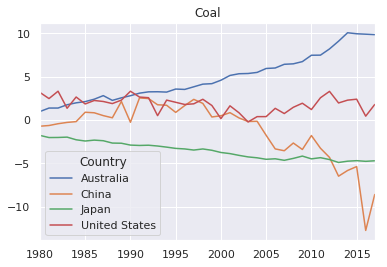

In [159]:
for kind in ["Total","Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]:
    countries = np.unique( netp_df[kind].to_numpy() )
    countries = np.append(countries,np.unique( netc_df[kind].to_numpy() ))
    countries = np.unique(countries)
    net_tops = net_frames[kind].loc[countries,:].copy()
    net_tops.T.plot()
    plt.title(kind)

We have plotted the net production grouped by energy source. In every chart we have plotted only the countries that scored as the best or the worst at a certain point in data history, for that energy source. This helps us understand some trends regarding the net production.

For example, Russia and Saudi Arabia have been the two best net producer of the world (all energy sources) for the past 40 years, and one can see that this is fundamentally due to being the leader net producers of natural gas and petroleum respectively. We must compare these to the charts in the section [Top producers](#Top-producers) about natural gas and petroleum productions, and we see recurring trends:
- regarding petroleum, the United States have a production which is similar to Saudi Arabia and Russia, but when it comes to _Net_ production they cannot hold the challenge, they have even been the top net _consumers_ for the majority of the time. This is undoubitably caused by the fact that the energy demand of the United States is much greater than Saudi Arabia's, even when we restrict to petroleum alone (as we saw, Saudi Arabia runs on oil alone, while the USA differentiate).
- regarding natural gas, again the United States have a production comparable to Russia, but they trail behind in _Net_ production, having been in deficit almost always since 1980 when it comes from energy from natural gas.

China went from being on par energetically to bein in deficit of more than 15 Btu in 2017. We saw in the section [Top producers](#Top-producers) that they quadrupled their coal energy production in this timespan (from 20 to 80 Btu), but judging from the net production they have needed even more coal energy, as they are still in deficit of more than 5 Btu as of 2017. We can deduce from these trends that the huge uprising in China's energy demand poured mainly on the coal industry over the years, and the increase has been so large that even the increased internal production could not supply it; and this despite China being the top coal energy producer by a landslide: they produce in Coal alone roughly 85 Btu as of 2017, to be compared with a _Total_ USA energy consumption of roughly 90 Btu in the same year.

Speaking of coal energy, the net productions of Australia and United States were similar until 1990, but subsequently Australia's increased up to 10 net Btu, while the USA's remained on average stable. We know that the United States slowly decrease coal energy production, so they must also have slowly decreased the usage of energy from coal. This may be due to a mix of factors: policies or cost efficency for example. We saw that the USA's production of nuclear and renewable energy is what really skyrocketed. What about Australia? Is this increase in net production a product of an increased production or a drop in coal energy usage? Let's plot their history to find out.

In [160]:
df_australia = data_lines[data_lines.loc[:,"Country"]=="Australia"].copy().sort_index()
plot_production(df_australia)

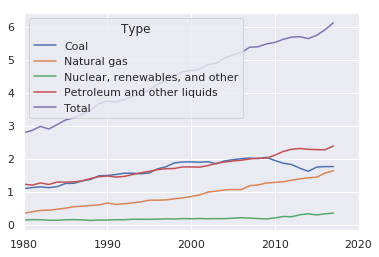

In [161]:
plot_consumption(df_australia)

Australia's total consumption doubled in the considered time span. The energy sources to which they turned in order to supply this increase were mainly Natural gas and Petroleum. To a certain extent, Coal also increased its energy production, but not as the others.In terms of production, though, we can clearly see that only Coal constantly increased, and it did so sharply. Australia passed to 2.5 Btu of coal energy produced in 1980, to roughly 12 Btu in 2017. Even factoring in the usage increase, it is clear that they became the top net producer of coal energy through 40 years of boosting the coal industry.

## Shares of energy sources in production over time

We now compute the percentage of total production that every energy source contributed, for every year in the record. We are investigating the following question: has some energy source grown to eat some other source's share?

In [162]:
world_prod = df_world.loc[('Production',["Petroleum and other liquids","Natural gas","Coal","Nuclear, renewables, and other"]),years]
world_prod

1980     1981     1982     1983  \
Category   Type                                                                 
Production Coal                             78.528  78.9341  81.7529  82.0599   
           Natural gas                      54.761  55.5735  55.4955   56.116   
           Nuclear, renewables, and other  28.3503  29.8139  31.4629  33.9751   
           Petroleum and other liquids     133.109   125.11  119.764  119.268   

                                              1984     1985     1986     1987  \
Category   Type                                                                 
Production Coal                            86.3517  90.3097  92.6303  94.9122   
           Natural gas                     61.7586  64.1245  65.3286  68.4561   
           Nuclear, renewables, and other  36.9393  39.5252  40.8308  42.2381   
           Petroleum and other liquids     122.553  121.134  126.547  127.415   

                                              1988     1989  ...     2008  \
Category   Type                                              ...            
Production Coal                            97.0171  98.3611  ...  141.894   
           Natural gas                     71.8529  74.2753  ...  111.656   
           Nuclear, renewables, and other  44.5903  45.5223  ...  68.7943   
           Petroleum and other liquids     132.483  134.515  ...  171.533   

                                              2009     2010     2011     2012  \
Category   Type                                                                 
Production Coal                            143.972  154.239  164.461  170.736   
           Natural gas                     109.557  116.946  121.003  123.533   
           Nuclear, renewables, and other   69.655  74.1268   75.106  75.4005   
           Petroleum and other liquids     168.759  172.978  173.421  177.646   

                                              2013     2014     2015     2016  \
Category   Type                                                                 
Production Coal                            172.987  173.298  168.537  157.993   
           Natural gas                     125.032   126.99  129.645  130.876   
           Nuclear, renewables, and other  79.3599  82.2969  83.5937  87.3227   
           Petroleum and other liquids     177.548   182.23  187.424   188.36   

                                              2017  
Category   Type                                     
Production Coal                            161.765  
           Natural gas                     136.127  
           Nuclear, renewables, and other  88.3207  
           Petroleum and other liquids      188.68  

[4 rows x 38 columns]

In [163]:
world_shares = world_prod.apply(lambda x: x / x.sum())
world_shares.loc[:,"2007"]

Category    Type                          
Production  Coal                              0.285565
            Natural gas                        0.22509
            Nuclear, renewables, and other    0.137919
            Petroleum and other liquids       0.351426
Name: 2007, dtype: object

In [164]:
world_shares.T.plot.area()
plt.legend(['Coal','Gas','Nuclear and renewables','Petroleum'])

This table and chart show the shares that each source contributed to the world production. From the data table we can see that gas and nuclear and renewables grew the most. Except for a few hits back, they have constantly enlarged their share, going from 18.6% and 9.6% in 1980, to 22.6% and 14.3% in 2010, to 23.7% and 15.4% in 2017. Coal has kept its share with some ups and downs: as we have seen, this is largerly due to a spike in China's production. Finally, petroleum has lost the most: from over 40% in the early 80s, it is now down to 32.8%. Petroleum has not gone over 35% since 2008.

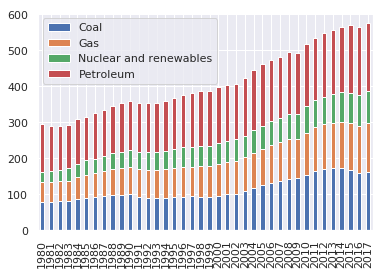

In [165]:
world_prod.T.plot(kind='bar',stacked=True)
plt.legend(['Coal','Gas','Nuclear and renewables','Petroleum'])

This graph shows the same kind of data, but not normalized. We can clearly see that gas and nuclear and renewables got larger.